In [148]:
import requests
from bs4 import BeautifulSoup
import re
import os

## Extract the words from Gutenberg

In [149]:
r = requests.get("https://www.gutenberg.org/files/10681/old/20040627-10681-h-body-pos.htm")
html = r.text
soup = BeautifulSoup(html, 'html.parser')

### Let's explain how the words along with their classes and divisions and sections are organized in the page

The words are organized in the page in the following manner:

1) They belong to a class
2) They belong to a division (if it exists) within the class
3) They belong to a section within the division (if it exists) or within the class


1) We can notice that all classes on the page are represented by a `<dt>` tag with an `<a>` tag inside it. 
The `<a>` tag has a name attribute that starts with **`CLASS`**. The text of the `<a>` tag is the name of the class.


2) We can notice that all divisions on the page are represented by a `<dt>` tag with an `<a>` tag inside it.
The `<a>` tag has a name attribute that starts with **`DIVISION`**. The text of the `<a>` tag is the name of the division.


3) We can notice that all sections on the page are represented by a `<dt>` tag with an `<a>` tag inside it.
The `<a>` tag has a name attribute that starts with **`SECTION`**. The text of the `<a>` tag is the name of the section.

Lastly, the words are represented by a `<dt>` tag with an `<a>` tag inside it. The `<a>` tag has a name attribute that is a number.
We notice that the words come after the `<a>` tag where the name attribute is a number and also that tag is inside a `<b>` tag.
So in order to get the words we must get the text of the `<b>` tag that comes after the `<a>` tag where the name attribute is a number.

With the above in mind, we can extract the hierarchy of classes, divisions, sections, and words from the page.
We can then create a directory structure that mirrors the structure of the page and save the words under each section to a file in the directory structure 
using a dictionary to hold the entire hierarchy.


In [150]:
# Initialize a dictionary to hold the entire hierarchy
hierarchy = {}
current_class = None
current_division = None
current_section = None

# Find all <dt> tags
dt_tags = soup.find_all('dt')

Having the dictionary initialized and the `<dt>` tags found, we can now iterate through each `<dt>` tag and extract the hierarchy of classes, divisions, sections, and words from the page.

In [151]:
# Adjusted regular expression to capture both cases: numbers only and numbers followed by a letter
word_regex = re.compile("^\d+[a-zA-Z]?$")
# Iterate through each <dt> tag
for dt in dt_tags:
    # Check for class
    class_a_tag = dt.find('a', attrs={'name': re.compile("^CLASS")})
    if class_a_tag:
        current_class = re.sub(r'\s+', ' ', class_a_tag.text).strip()
        hierarchy[current_class] = {'divisions': {}, 'sections': {}}
        current_division = None
        current_section = None
        # Now that we got the class we can continue to the next <dt> tag to check for division/section
        continue

    # Check for division
    division_a_tag = dt.find('a', attrs={'name': re.compile("^DIVISION")})
    if division_a_tag and current_class:
        current_division = re.sub(r'\s+', ' ', division_a_tag.text).strip()
        hierarchy[current_class]['divisions'][current_division] = {'sections': {}}
        current_section = None
        # Now that we got the division we can continue to the next <dt> tag to check for section
        continue

    # Check for section
    section_a_tag = dt.find('a', attrs={'name': re.compile("^SECTION")})
    if section_a_tag:
        current_section = re.sub(r'\s+', ' ', section_a_tag.text).strip()
        if current_division:
            hierarchy[current_class]['divisions'][current_division]['sections'][current_section] = []
        else:
            hierarchy[current_class]['sections'][current_section] = []
        # Now that we got the section we can continue to the next <dt> tag to check for words
        continue

    # Check for words (the words are before an a tag with a name attribute that is a number (integer or float))
    word_a_tags = dt.find_all('a', attrs={'name': re.compile("^\d+(\.\d+)?$")})
    for word_a_tag in word_a_tags:
        word = word_a_tag.find_next('b').get_text() if word_a_tag.find_next('b') else ''
        print(word)
        word = re.sub(r'\s+', ' ', word).strip()
        if current_section:
            if current_division:
                hierarchy[current_class]['divisions'][current_division]['sections'][current_section].append(word)
            else:
                hierarchy[current_class]['sections'][current_section].append(word)

Existence
Inexistence
Substantiality
Unsubstantiality
Intrinsicality
Extrinsicality
State
Circumstance
Relation
Irrelation
Consanguinity
Correlation
Identity
Contrariety
Difference
Uniformity
Nonuniformity
Similarity
Dissimilarity
Imitation
Nonimitation
Variation
Copy
Prototype
Agreement
Disagreement
Quantity
Degree
Equality
Inequality
Mean
Compensation
Greatness
Smallness
Superiority
Inferiority
Increase
Nonincrease, Decrease
Addition
Nonaddition. Subtraction
Adjunct
Remainder
Decrement
Mixture
Simpleness
Junction
Disjunction
Connection
Coherence
Incoherence
Combination
Decomposition
Whole
Part
Completeness
Incompleteness
Composition
Exclusion
Component
Extraneousness
Order
Disorder
Complexity
Arrangement
Derangement
Precedence
Sequence
Precursor
Sequel
Beginning
End
Middle
Continuity
Discontinuity
Term
Assemblage
Nonassemblage. Dispersion
Focus
Class
Inclusion
Exclusion
Generality
Speciality
Normality
Multiformity
Conformity
Unconformity
Number
Numeration
List
Unity
Accompaniment
Dua

In [152]:
hierarchy

{'WORDS EXPRESSING ABSTRACT RELATIONS': {'divisions': {},
  'sections': {'EXISTENCE': ['Existence',
    'Inexistence',
    'Substantiality',
    'Unsubstantiality',
    'Intrinsicality',
    'Extrinsicality',
    'State',
    'Circumstance'],
   'RELATION': ['Relation',
    'Irrelation',
    'Consanguinity',
    'Correlation',
    'Identity',
    'Contrariety',
    'Difference',
    'Uniformity',
    'Nonuniformity',
    'Similarity',
    'Dissimilarity',
    'Imitation',
    'Nonimitation',
    'Variation',
    'Copy',
    'Prototype',
    'Agreement',
    'Disagreement'],
   'QUANTITY': ['Quantity',
    'Degree',
    'Equality',
    'Inequality',
    'Mean',
    'Compensation',
    'Greatness',
    'Smallness',
    'Superiority',
    'Inferiority',
    'Increase',
    'Nonincrease, Decrease',
    'Addition',
    'Nonaddition. Subtraction',
    'Adjunct',
    'Remainder',
    'Decrement',
    'Mixture',
    'Simpleness',
    'Junction',
    'Disjunction',
    'Connection',
    'Cohere

In [153]:
# Count the words (the words are inside the sections in the hierarchy)
word_count = sum([len(words) for class_content in hierarchy.values() for division_content in
                  class_content.get('divisions', {}).values() for words in
                  division_content.get('sections', {}).values()])
word_count

389

### Create the directory structure and save the words to files

Now that we have the hierarchy, we can create a directory structure that mirrors the structure of the page and save the words under each section to a file in the directory structure.

Let's start by creating a function that writes the words to a file.

In [154]:
def write_words_to_file(words, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        file.write('\n'.join(words))

We start by creating a directory structure that mirrors the structure of the page.

In [155]:
def create_directory_structure(base_path, hierarchy):
    for class_name, class_content in hierarchy.items():
        class_path = os.path.join(base_path, class_name)
        os.makedirs(class_path, exist_ok=True)

        for division_name, division_content in class_content.get('divisions', {}).items():
            division_path = os.path.join(class_path, division_name)
            os.makedirs(division_path, exist_ok=True)

            for section_name, words in division_content.get('sections', {}).items():
                section_path = os.path.join(division_path, section_name)
                os.makedirs(section_path, exist_ok=True)
                write_words_to_file(words, os.path.join(section_path, 'words.txt'))

        for section_name, words in class_content.get('sections', {}).items():
            section_path = os.path.join(class_path, section_name)
            os.makedirs(section_path, exist_ok=True)
            write_words_to_file(words, os.path.join(section_path, 'words.txt'))


# Create the directory structure
base_path = 'roget_thesaurus'
create_directory_structure(base_path, hierarchy)

In [156]:
# Count the lines in the files
line_count = sum([sum([len(open(os.path
                                .join(root, file)).readlines()) for file in files]) for root, dirs, files in
                  os.walk(base_path)])
line_count

1044

## Get Word Embeddings

There are two ways which we can get the embeddings for the words.

1) Get the OpenAI text-embedding-3-small
2) Use the Ollama Embeddings , more specifically from the latest Mistral-7B model

### 1) Get the OpenAI text-embedding-3-small

First we need to set up the OpenAI API from the environment variable which contains the API key.

In [157]:
import openai

# Set the API
openai.api_key = os.environ.get("OPENAI_API_KEY")

Now we can use the OpenAI API to get the embeddings for the words

In [158]:
from openai import OpenAI

client = OpenAI()


def get_embedding(text, model="text-embedding-3-small"):
    text = text.replace("\n", " ")
    return client.embeddings.create(input=[text], model=model).data[0].embedding


# Apply the function to the words files and save the embeddings to a file
def get_embeddings_from_files(base_path, model="text-embedding-3-small"):
    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file == 'words.txt':
                words_file_path = os.path.join(root, file)
                embeddings_file_path = os.path.join(root, 'embeddings.txt')
                with open(words_file_path, 'r', encoding='utf-8') as file:
                    words = file.read().splitlines()
                embeddings = [get_embedding(word, model) for word in words]
                with open(embeddings_file_path, 'w', encoding='utf-8') as file:
                    file.write('\n'.join([str(embedding) for embedding in embeddings]))


# Get the embeddings
get_embeddings_from_files(base_path)

OpenAIError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable

OR


In [ ]:
import os
import pandas as pd
import numpy as np
from openai import OpenAI

client = OpenAI()

def get_embedding(text, model="text-embedding-3-small"):
    text = text.replace("\n", " ")
    return client.embeddings.create(input=[text], model=model).data[0].embedding


def read_text(file_path):
    with open(file_path, 'r') as file:
        return file.read()


def process_directory(root_dir):
    embeddings = []
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file == 'word.txt':
                file_path = os.path.join(root, file)
                text = read_text(file_path)
                embedding = get_embedding(text)
                embeddings.append({'file_path': file_path, 'embedding': embedding})
    return embeddings


# Example usage
root_dir = 'your/directory/path'  # Replace with your directory path
embeddings = process_directory(root_dir)

# Convert embeddings to DataFrame and save
df = pd.DataFrame(embeddings)
df.to_csv('output/embeddings.csv', index=False)

### 2) Use the Ollama Embeddings

In order to use the mistral embeddings we first need download Ollama in a linux environment from the command line using the following command:

```bash
curl -fsSL https://ollama.com/install.sh | sh
```

Then we can get the mistral model and embeddings using the following command:

```bash
ollama run mistral
```

After we have downloaded the mistral model we can use the OllamaEmbeddings class to get the embeddings for the words.
We can start by executing the following command in our linux terminal:

```bash
ollama serve
```

Then we can use the OllamaEmbeddings class to get the embeddings for the words.

> Note: In windows we can use the WSL to run the Ollama commands and get the embeddings.

Having now the embeddings we must load the words from the files and get the embeddings for the words.
To make this process easier we will use the `langchain` library which provides a class called `OllamaEmbeddings` that we can use to get the embeddings for the words.

> Note: Langchain also provides many other models that we can use to get the embeddings for the words along with Ollama.

In [1]:
from langchain_community.embeddings import OllamaEmbeddings

mistral_embeddings = OllamaEmbeddings(model="mistral")

Langchain also provides many useful tools so we can use the `OllamaEmbeddings` class to get the embeddings for the words.

We can start by loading the words from the files using the `DirectoryLoader` and `TextLoader` classes.

In [2]:
from langchain_community.document_loaders import DirectoryLoader, TextLoader

path = "roget_thesaurus"
text_loader_kwargs = {'autodetect_encoding': True}
loader = DirectoryLoader(path, glob="**/*.txt", loader_cls=TextLoader,
                         loader_kwargs=text_loader_kwargs, show_progress=True,
                         use_multithreading=True)
docs = loader.load()

100%|██████████| 39/39 [00:00<00:00, 6499.70it/s]


In [3]:
# Create a list of the documents where each document is a word from the files and split the documents according to \n
docs = [doc.page_content.split("\n") for doc in docs]
docs

[['Cause',
  'Effect',
  'Attribution',
  'Chance',
  'Power',
  'Impotence',
  'Strength',
  'Weakness',
  'Production',
  'Destruction',
  'Reproduction',
  'Producer',
  'Destroyer',
  'Paternity',
  'Posterity',
  'Productiveness',
  'Unproductiveness',
  'Agency',
  'Physical Energy',
  'Physical Inertness',
  'Violence',
  'Moderation',
  'Influence',
  'Absence of Influence',
  'Tendency',
  'Liability',
  'Concurrence',
  'Counteraction'],
 ['Change',
  'Permanence',
  'Cessation',
  'Continuance in action',
  'Conversion',
  'Reversion',
  'Revolution',
  'Substitution',
  'Interchange',
  'Changeableness',
  'Stability',
  'Eventuality',
  'Destiny'],
 ['Existence',
  'Inexistence',
  'Substantiality',
  'Unsubstantiality',
  'Intrinsicality',
  'Extrinsicality',
  'State',
  'Circumstance'],
 ['Number',
  'Numeration',
  'List',
  'Unity',
  'Accompaniment',
  'Duality',
  'Duplication',
  'bisection',
  'Triality',
  'Triplication',
  'Trisection',
  'Four',
  'Quadruplicat

In [4]:
# Now make the documents a flat list
docs = [word for doc in docs for word in doc]
docs

['Cause',
 'Effect',
 'Attribution',
 'Chance',
 'Power',
 'Impotence',
 'Strength',
 'Weakness',
 'Production',
 'Destruction',
 'Reproduction',
 'Producer',
 'Destroyer',
 'Paternity',
 'Posterity',
 'Productiveness',
 'Unproductiveness',
 'Agency',
 'Physical Energy',
 'Physical Inertness',
 'Violence',
 'Moderation',
 'Influence',
 'Absence of Influence',
 'Tendency',
 'Liability',
 'Concurrence',
 'Counteraction',
 'Change',
 'Permanence',
 'Cessation',
 'Continuance in action',
 'Conversion',
 'Reversion',
 'Revolution',
 'Substitution',
 'Interchange',
 'Changeableness',
 'Stability',
 'Eventuality',
 'Destiny',
 'Existence',
 'Inexistence',
 'Substantiality',
 'Unsubstantiality',
 'Intrinsicality',
 'Extrinsicality',
 'State',
 'Circumstance',
 'Number',
 'Numeration',
 'List',
 'Unity',
 'Accompaniment',
 'Duality',
 'Duplication',
 'bisection',
 'Triality',
 'Triplication',
 'Trisection',
 'Four',
 'Quadruplication',
 'Quadrisection',
 'Five',
 'Quinquesection',
 'Plurality',

In [5]:
len(docs)

1044

## Checkpoint for the vector database

In [20]:
import chromadb
client = chromadb.PersistentClient(path="./chroma_db")

docs_embedded = mistral_embeddings.embed_documents(docs)

KeyboardInterrupt: 

In [23]:
from tqdm import tqdm
results = []
for doc in tqdm(docs):
    results.append(mistral_embeddings.embed_query(doc))

  4%|▎         | 38/1044 [01:28<39:05,  2.33s/it]


KeyboardInterrupt: 

In [19]:
from tqdm import tqdm

for i, doc in tqdm(enumerate(docs_embedded)):
    client.add_document(doc, {"word": docs[i]})

NameError: name 'docs_embedded' is not defined

In [ ]:
len(word_embeddings)

Let's have a look at the documents

In [6]:
docs

['Cause',
 'Effect',
 'Attribution',
 'Chance',
 'Power',
 'Impotence',
 'Strength',
 'Weakness',
 'Production',
 'Destruction',
 'Reproduction',
 'Producer',
 'Destroyer',
 'Paternity',
 'Posterity',
 'Productiveness',
 'Unproductiveness',
 'Agency',
 'Physical Energy',
 'Physical Inertness',
 'Violence',
 'Moderation',
 'Influence',
 'Absence of Influence',
 'Tendency',
 'Liability',
 'Concurrence',
 'Counteraction',
 'Change',
 'Permanence',
 'Cessation',
 'Continuance in action',
 'Conversion',
 'Reversion',
 'Revolution',
 'Substitution',
 'Interchange',
 'Changeableness',
 'Stability',
 'Eventuality',
 'Destiny',
 'Existence',
 'Inexistence',
 'Substantiality',
 'Unsubstantiality',
 'Intrinsicality',
 'Extrinsicality',
 'State',
 'Circumstance',
 'Number',
 'Numeration',
 'List',
 'Unity',
 'Accompaniment',
 'Duality',
 'Duplication',
 'bisection',
 'Triality',
 'Triplication',
 'Trisection',
 'Four',
 'Quadruplication',
 'Quadrisection',
 'Five',
 'Quinquesection',
 'Plurality',

We can see that the docs contain the `\n` characters so we must remove them and then get the embeddings for the words.
To do that effectively and apply later the mistral embeddings, we will use the `SentenceTransformersTokenTextSplitter` text splitter.


In [ ]:
from langchain.text_splitter import SentenceTransformersTokenTextSplitter

text_splitter = SentenceTransformersTokenTextSplitter(chunk_overlap=0)

Let's see how that works with an example file

In [ ]:
# Read a single txt file from the directory
text = open("data2/WORDS EXPRESSING ABSTRACT RELATIONS/CAUSATION/words.txt", "r").read()
texts = text_splitter.create_documents([text])
print(texts)

Let's now apply this text splitter to the documents

In [ ]:
# Split the documents
splits = text_splitter.split_documents(docs)

Now that we have the splits we can get the embeddings for the words using the `OllamaEmbeddings` class and store the embeddings in a vector
database, in this case we will store them in a Chroma database. We will make the vector database using the `Chroma` class from the `langchain` library 
and make it persistent by writing it to a directory named `chroma_db` with a collection named `roget`.


In [7]:
from langchain_community.vectorstores.chroma import Chroma

vectorstore = Chroma.from_texts(docs, embedding=mistral_embeddings, collection_name="roget",
                                persist_directory="./chroma_db")

Having saved the embeddings in the vector database we can now use the `Chroma` class to get the embeddings for the words from the vector database.

In [8]:
# load from disk
from langchain_community.vectorstores.chroma import Chroma

vector_db = Chroma(persist_directory="./chroma_db",
                   embedding_function=mistral_embeddings,
                   collection_name="roget")


In [9]:
vector_db.get(include=["embeddings"])['embeddings'][0]

[1.5556493997573853,
 -6.121205806732178,
 -4.492718696594238,
 -1.9262503385543823,
 3.8164706230163574,
 -3.4083504676818848,
 -6.770772457122803,
 2.8680295944213867,
 -2.505934000015259,
 -5.644752025604248,
 -4.503164291381836,
 -0.23170815408229828,
 1.1763440370559692,
 -1.2599910497665405,
 7.68607234954834,
 -0.6492279171943665,
 1.2238367795944214,
 2.6116995811462402,
 1.559502363204956,
 -9.220084190368652,
 0.31469640135765076,
 -1.2364697456359863,
 2.5014407634735107,
 9.670278549194336,
 -8.22414493560791,
 -5.686959743499756,
 -5.997664928436279,
 4.868986129760742,
 1.4868706464767456,
 5.473894119262695,
 -4.155873775482178,
 0.8587428331375122,
 2.3624417781829834,
 -4.776278495788574,
 6.086277484893799,
 1.559440016746521,
 -3.534364938735962,
 0.6194186806678772,
 -8.33431339263916,
 5.044794082641602,
 6.818313121795654,
 7.956183910369873,
 1.9498677253723145,
 1.3656634092330933,
 3.4030094146728516,
 6.736318588256836,
 1.99083411693573,
 1.7895605564117432,


In [11]:
import chromadb

client = chromadb.PersistentClient(path="./chroma_db")

In [12]:
collection = client.get_collection("roget")

In [13]:
collection.get(include=["embeddings"])['embeddings'][0]

[1.5556493997573853,
 -6.121205806732178,
 -4.492718696594238,
 -1.9262503385543823,
 3.8164706230163574,
 -3.4083504676818848,
 -6.770772457122803,
 2.8680295944213867,
 -2.505934000015259,
 -5.644752025604248,
 -4.503164291381836,
 -0.23170815408229828,
 1.1763440370559692,
 -1.2599910497665405,
 7.68607234954834,
 -0.6492279171943665,
 1.2238367795944214,
 2.6116995811462402,
 1.559502363204956,
 -9.220084190368652,
 0.31469640135765076,
 -1.2364697456359863,
 2.5014407634735107,
 9.670278549194336,
 -8.22414493560791,
 -5.686959743499756,
 -5.997664928436279,
 4.868986129760742,
 1.4868706464767456,
 5.473894119262695,
 -4.155873775482178,
 0.8587428331375122,
 2.3624417781829834,
 -4.776278495788574,
 6.086277484893799,
 1.559440016746521,
 -3.534364938735962,
 0.6194186806678772,
 -8.33431339263916,
 5.044794082641602,
 6.818313121795654,
 7.956183910369873,
 1.9498677253723145,
 1.3656634092330933,
 3.4030094146728516,
 6.736318588256836,
 1.99083411693573,
 1.7895605564117432,


In [15]:
collection.query(collection.get(include=["embeddings"])['embeddings'][0], n_results=1)

{'ids': [['e96e7ea7-c8cf-11ee-b0be-bcf4d4820bd6']],
 'distances': [[0.0]],
 'metadatas': [[None]],
 'embeddings': None,
 'documents': [['Cause']],
 'uris': None,
 'data': None}

### Now that we have the embeddings for the words stored in our vector database we can use the `Chroma` class to get the embeddings for the words from the vector database.

## Clustering

With the embeddings at hand, you can check whether unsupervised Machine Learning methods can arrive at classifications that are comparable to the Roget's Thesaurus Classification. 

First, we will use the KMeans algorithm to cluster the words into six clusters (to get the six classes of the Roget's Thesaurus Classification).

In [44]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=6, random_state=42, n_init='auto', max_iter=1000)

Let's now create a dataframe with the embeddings and the words

In [56]:
df = pd.DataFrame({'embedding': vector_db.get(include=["embeddings"])['embeddings']})
df['word'] = df['embedding'].apply(lambda x: collection.query(x , n_results=1)['documents'][0][0])

In [57]:
# Make the words as index of the dataframe to prepare for the clustering
df.set_index('word', inplace=True)

We can see that the words are now the index of the dataframe

In [58]:
df

,embedding
word,
Cause,"[1.5556493997573853, -6.121205806732178, -4.49..."
Effect,"[8.96782398223877, 2.126828193664551, -2.70874..."
Attribution,"[0.257324755191803, 7.443014144897461, -10.725..."
Chance,"[1.7602263689041138, 2.917849063873291, -4.229..."
Inutility,"[-0.8657410144805908, -2.8984415531158447, 1.4..."
...,...
Liberality,"[1.043811559677124, 0.5305129885673523, -1.044..."
Economy,"[0.677468478679657, -2.615168571472168, -6.307..."
Greed,"[2.1955037117004395, -6.038029670715332, -8.91..."


Now we can fit the model to the embeddings

In [59]:
model.fit(df['embedding'].to_list())

KMeans(max_iter=1000, n_clusters=6, n_init='auto', random_state=42)

We can now get the cluster centers

In [60]:
collection.query(model.cluster_centers_)['documents']

[['Inutility',
  'Inorganization',
  'Counteraction',
  'Undueness',
  'Lowness',
  'Misteaching',
  'Recorder',
  'Obliteration',
  'Inexpectation',
  'Posteriority'],
 ['Dimsightedness',
  'Inodorousness',
  'Unsavoriness',
  'Fastidiousness',
  'Inexpedience',
  'Incogitancy',
  'Unproductiveness',
  'Artlessness',
  'Unmeaningness',
  'Unsubstantiality'],
 ['Inexpectation',
  'Lowness',
  'Undueness',
  'Inorganization',
  'Lenity',
  'Inutility',
  'Irrelation',
  'Salubrity',
  'Aphony',
  'Obliteration'],
 ['Obliteration',
  'Counteraction',
  'Inorganization',
  'Undueness',
  'Inutility',
  'Multiformity',
  'Exteriority',
  'Unsubstantiality',
  'Misnomer',
  'Transientness'],
 ['Inutility',
  'Counteraction',
  'Deviation',
  'Infrequency',
  'Shortcoming',
  'Arrangement',
  'Posteriority',
  'Unimportance',
  'Difference',
  'Comparison'],
 ['Multiformity',
  'Exteriority',
  'Extrinsicality',
  'Extraneousness',
  'Unsubstantiality',
  'Changeableness',
  'Instantaneity',

Let us now procceed to add the clusters to the dataframe and draw categories for each cluster

In [61]:
df['cluster'] = model.labels_

In [67]:
df

,embedding,cluster
word,,
Cause,"[1.5556493997573853, -6.121205806732178, -4.49...",0
Effect,"[8.96782398223877, 2.126828193664551, -2.70874...",2
Attribution,"[0.257324755191803, 7.443014144897461, -10.725...",4
Chance,"[1.7602263689041138, 2.917849063873291, -4.229...",2
Inutility,"[-0.8657410144805908, -2.8984415531158447, 1.4...",0
...,...,...
Liberality,"[1.043811559677124, 0.5305129885673523, -1.044...",1
Economy,"[0.677468478679657, -2.615168571472168, -6.307...",3
Greed,"[2.1955037117004395, -6.038029670715332, -8.91...",1


In [68]:
# Make the words to be a column
df.reset_index(inplace=True)

In [69]:
df

,word,embedding,cluster
0,Cause,"[1.5556493997573853, -6.121205806732178, -4.49...",0
1,Effect,"[8.96782398223877, 2.126828193664551, -2.70874...",2
2,Attribution,"[0.257324755191803, 7.443014144897461, -10.725...",4
3,Chance,"[1.7602263689041138, 2.917849063873291, -4.229...",2
4,Inutility,"[-0.8657410144805908, -2.8984415531158447, 1.4...",0
...,...,...,...
1039,Liberality,"[1.043811559677124, 0.5305129885673523, -1.044...",1
1040,Economy,"[0.677468478679657, -2.615168571472168, -6.307...",3
1041,Greed,"[2.1955037117004395, -6.038029670715332, -8.91...",1
1042,Prodigality,"[7.0008625984191895, -3.664126396179199, -6.40...",1


Now having our dataframe in the normal form again we can proceed to draw categories for each cluster
similar to the naming of the roget classes.

Let's start by getting the categories from the roget thesaurus from the directory structure

In [92]:
import tensorflow as tf
dataset = tf.keras.preprocessing.text_dataset_from_directory(
    "roget_thesaurus",
    batch_size=32,
    seed=1234,
    validation_split=0
)

categories = list(dataset.class_names)
categories

Found 39 files belonging to 6 classes.


['WORDS EXPRESSING ABSTRACT RELATIONS',
 'WORDS RELATING TO MATTER',
 'WORDS RELATING TO SPACE',
 'WORDS RELATING TO THE INTELLECTUAL FACULTIES',
 'WORDS RELATING TO THE SENTIENT AND MORAL POWERS',
 'WORDS RELATING TO THE VOLUNTARY POWERS']

### Now we can use the `ChatOllama` class to get the categories for each cluster providing the words and the categories to the LLM model to get the categories for each cluster and then we can compare the categories with the roget categories.

In [63]:
from langchain_community.chat_models import ChatOllama
import torch

llm_model = 'mistral'

device = "cuda" if torch.cuda.is_available() else "cpu"

# We set the temperature to 0.0 to get the most likely categories and we use the mistral model
llm = ChatOllama(model=llm_model, temperature=0.0, device=device)

Lets now construct the prompt and use the `ChatPromptTemplate` class to do so and build the chain to get the categories for each cluster

In [144]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate


prompt = ChatPromptTemplate.from_template("Provide a category that classifies all these words about what they express (only into one category) : {words}"
                                          "similar with the naming of the following categories: {categories} along with a small explanation of why you chose to name the category in this way. At the end of the explanation, please write the category again inside <<>>. For example: <<category>>")

# using LangChain Expressive Language chain syntax
# learn more about the LCEL on
# https://python.langchain.com/docs/expression_language/why
chain = prompt | llm | StrOutputParser()

In [145]:
words = ",".join(
        df[df.cluster == 0]["word"]
        .sample(10, random_state=42)
        .values
    )

words

'Messenger,Undertaking,Inorganization,Misteaching,Business,Merchant,Counteraction,Conduct,Taking,Junction'

In [146]:
chain.invoke({"words": words, "categories": categories})

' The given words can be classified into the following category:\n\n<<WORDS RELATING TO ACTIVITIES AND PROCESSES>>\n\nExplanation: This category includes words that express various types of activities, actions, processes, and undertakings. These words are related to the doing or making aspect of things, as opposed to the being or having aspect. The words in this list (Messenger, Undertaking, Inorganization, Misteaching, Business, Merchant, Counteraction, Conduct, Taking, Junction) can all be considered actions or processes that occur in different contexts.'

We can now use the `ChatOllama` class to get the categories for each cluster providing the words and the categories to the LLM model to get the categories for each cluster and then we can compare the categories with the roget categories.

We will also get the explanations for the categories and compare them with the roget categories.

In [147]:
import re
# Reading words belonging to each cluster
num_words = 20

classes = []

for i in range(6):
    print(f"Cluster {i} Theme:", end=" ")

    words = ",".join(
        df[df.cluster == i]["word"]
        .values
    )
    response = chain.invoke({"words": words, "categories": categories})
    print(response)
    
    pattern = r'<<([^>]*)>>'
    matches = re.finditer(pattern, response)
    classes.append([match.group(1) for match in matches])
    sample_cluster_rows = df[df.cluster == i]['word'].sample(num_words, random_state=42)
    for j in range(num_words):
        print(sample_cluster_rows.iloc[j], end=", ")

    print("-" * 100)

Cluster 0 Theme:  Based on the given words, I would suggest the following category: "WORDS RELATING TO CAUSES AND EFFECTS."

Explanation: The majority of the given words can be classified as expressing various types of relationships or connections between different entities. Many of these relationships revolve around causes and effects. For instance, words like "Cause," "Precursor," "Producer," "Destroyer," "Increase," "Decrease," "Counteraction," and "Opponent" all imply some sort of causal relationship. Other words, such as "Junction," "Crossing," "Connection," and "Link," suggest a relationship between different things that brings them closer together or binds them in some way. Additionally, words like "Misteaching," "Inutility," and "Obliteration" imply a lack of effect or consequence. Therefore, it seems appropriate to group these words under the category "WORDS RELATING TO CAUSES AND EFFECTS."

<<WORDS RELATING TO CAUSES AND EFFECTS>>
Messenger, Undertaking, Inorganization, Miste

In [148]:
classes

[['WORDS RELATING TO CAUSES AND EFFECTS'],
 ['WORDS RELATING TO THE SENTIENT AND MORAL POWERS'],
 ['WORDS RELATING TO MATTER AND THE PHYSICAL WORLD'],
 ['Words Relating to Concepts and Interactions'],
 ['WORDS RELATING TO LOGICAL AND LINGUISTIC CONCEPTS'],
 ['Words Relating to Existence and Reality']]

We can also draw the clusters in a 2d space using t-SNE from the `sklearn` library

In [135]:
# Make vector_db.get(include=["embeddings"])['embeddings'] to a numpy array
import numpy as np
from ast import literal_eval

embeddings = df['embedding'].apply(literal_eval).apply(np.array)

Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

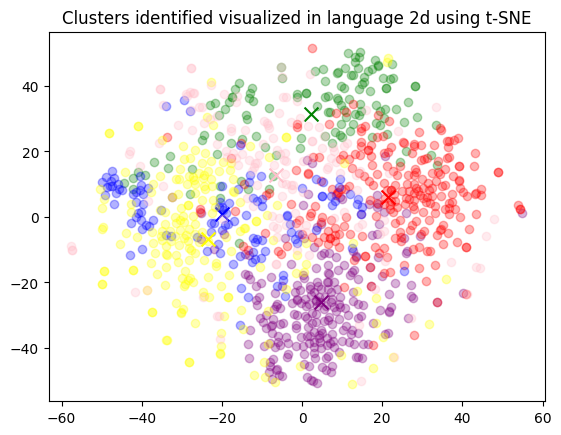

In [31]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200)
vis_dims2 = tsne.fit_transform(embeddings)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red", "blue", "yellow", "pink"]):
    xs = np.array(x)[df.cluster == category]
    ys = np.array(y)[df.cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
plt.title("Clusters identified visualized in language 2d using t-SNE")